In [1]:
import numpy as np
import pickle
import os
import re
import pandas as pd
import tqdm
import glob

import sys
sys.path.append("../../scripts")

import matplotlib.pyplot as plt

from scripts.run_bubblewrap import BubblewrapRun

In [2]:
files = glob.glob("*pickle")
files.sort()
files[-2:]

['bubblewrap_run_2023-04-26-12-10-46.pickle',
 'bubblewrap_run_2023-04-26-12-14-09.pickle']

In [20]:
file = 'bubblewrap_run_2023-04-26-11-22-38.pickle'
file

'bubblewrap_run_2023-04-26-11-22-38.pickle'

In [21]:
with open(file, "rb") as fhan:
    br = pickle.load(fhan)
    if br.bw_parameters and "seed" not in br.bw_parameters:
        br.bw_parameters["seed"] = 42

In [22]:
for key, value in br.bw_parameters.items():
    print(f"{key}: {value}")
print(f"input file: {br.file}")
print(f"savefile: {br.outfile}")

num: 200
lam: 0.001
nu: 0.001
eps: 0.001
step: 0.08
M: 30
B_thresh: -10
batch: False
batch_size: 1
go_fast: False
lookahead_steps: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
seed: 42
input file: ./generated/neuropixel_reduced.npz
savefile: generated/bubblewrap_runs/bubblewrap_run_2023-04-26-11-22-38.pickle


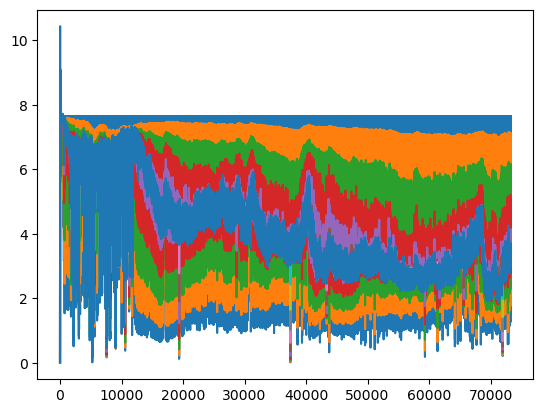

In [23]:
%matplotlib inline
plt.plot(br.entropy_list);


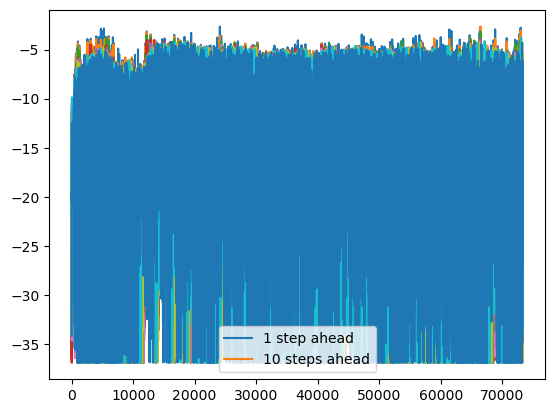

In [24]:
plt.plot(br.pred_list)
plt.legend(["1 step ahead", "10 steps ahead"])

In [25]:
pp_means = []
ent_means = []
for i, step in enumerate(br.bw_parameters["lookahead_steps"]):
    pp_means.append(np.mean(br.pred_list[-T//2:,i]))
    print(f"pred. prob. {step:>2} step(s) ahead mean: {pp_means[-1]}")
    
for i, step in enumerate(br.bw_parameters["lookahead_steps"]):
    ent_means.append(np.mean(br.entropy_list[-T//2:,i]))
    print(f"entropy     {step:>2} step(s) ahead mean: {ent_means[-1]}")


pred. prob.  1 step(s) ahead mean: -12.542464256286621
pred. prob.  2 step(s) ahead mean: -12.639108657836914
pred. prob.  4 step(s) ahead mean: -12.689823150634766
pred. prob.  8 step(s) ahead mean: -12.763327598571777
pred. prob. 16 step(s) ahead mean: -12.845612525939941
pred. prob. 32 step(s) ahead mean: -12.896866798400879
pred. prob. 64 step(s) ahead mean: -12.934934616088867
pred. prob. 128 step(s) ahead mean: -12.979741096496582
pred. prob. 256 step(s) ahead mean: -13.03969669342041
pred. prob. 512 step(s) ahead mean: -13.11751937866211
pred. prob. 1024 step(s) ahead mean: -13.290766716003418
entropy      1 step(s) ahead mean: 4.089688301086426
entropy      2 step(s) ahead mean: 4.286342144012451
entropy      4 step(s) ahead mean: 4.101071357727051
entropy      8 step(s) ahead mean: 3.6771059036254883
entropy     16 step(s) ahead mean: 3.331937789916992
entropy     32 step(s) ahead mean: 3.2004806995391846
entropy     64 step(s) ahead mean: 3.1810362339019775
entropy     128 st

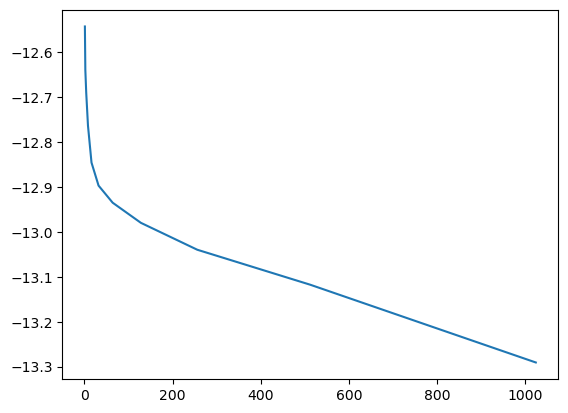

In [26]:
plt.plot(br.bw_parameters["lookahead_steps"], pp_means)

# Comparing new and old forcasting metrics

In [144]:
old_way_file = 'bubblewrap_run_2023-04-26-17-44-56.pickle' # fast and separated
new_way_file = 'bubblewrap_run_2023-04-26-17-45-20.pickle'
dataset = "fast speed"

# new_way_file = 'bubblewrap_run_2023-04-25-13-05-20.pickle' # slow and separated
#  old_way_file = 'bubblewrap_run_2023-04-25-13-06-21.pickle'
# dataset = "slow speed"

# new_way_file = 'bubblewrap_run_2023-04-25-13-12-25.pickle' # .5-speed and separated
#  old_way_file = 'bubblewrap_run_2023-04-25-13-13-57.pickle'
# dataset = ".5 speeed"

# old_way_file = 'bubblewrap_run_2023-04-25-15-44-11.pickle' # shuffled
# new_way_file = 'bubblewrap_run_2023-04-25-15-44-56.pickle'
# dataset = "shuffled"

# old_way_file = 'bubblewrap_run_2023-04-25-14-31-16.pickle' # monkey reach
# new_way_file = 'bubblewrap_run_2023-04-25-14-31-40.pickle'
# dataset = "monkey reach"

# old_way_file = 'bubblewrap_run_2023-04-25-14-52-37.pickle' # neuropixel
# new_way_file = 'bubblewrap_run_2023-04-25-15-15-23.pickle'
# dataset = "neuropixel"



# old_way_file = 'bubblewrap_run_2023-04-26-11-14-53.pickle' # monkey reach far
# new_way_file = 'bubblewrap_run_2023-04-26-11-14-58.pickle'
# dataset = "m.r. far predictions"

# old_way_file = 'bubblewrap_run_2023-04-26-11-19-19.pickle'
# new_way_file = 'bubblewrap_run_2023-04-26-11-22-38.pickle'
# dataset = "npxl far pred."

# new_way_file = 'bubblewrap_run_2023-04-26-12-10-46.pickle'
# old_way_file = 'bubblewrap_run_2023-04-26-12-14-09.pickle'
# dataset = "widefield"

# new_way_file = 'bubblewrap_run_2023-04-26-15-26-06.pickle'
#  old_way_file = 'bubblewrap_run_2023-04-26-15-30-31.pickle'
# dataset = "mouse"


with open(new_way_file, "rb") as fhan:
    new_way_br = pickle.load(fhan)

with open(old_way_file, "rb") as fhan:
    old_way_br = pickle.load(fhan)

In [145]:
for key, value in new_way_br.bw_parameters.items():
    print(f"{key}: {value}")
print(f"input file: {new_way_br.file}")
print(f"savefile: {new_way_br.outfile}")

num: 8
lam: 0.001
nu: 0.001
eps: 0.0001
step: 0.08
M: 100
B_thresh: -5
batch: False
batch_size: 1
go_fast: False
lookahead_steps: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
seed: 42
input file: ./generated/clock-steadier_farther.npz
savefile: generated/bubblewrap_runs/bubblewrap_run_2023-04-26-17-45-20.pickle


In [146]:
assert new_way_br.bw_parameters.items() == old_way_br.bw_parameters.items()
assert np.all(new_way_br.entropy_list == old_way_br.entropy_list)
assert np.all((new_way_br.pred_list == old_way_br.pred_list)[:,0])
assert new_way_br.bw_parameters["lookahead_steps"] == old_way_br.bw_parameters["lookahead_steps"]
print((new_way_br.pred_list == old_way_br.pred_list)[:,1:].mean())

0.0


In [147]:
if "clock" in new_way_br.file:
    states = np.load("../../"+new_way_br.file)["x"]
else:
    states = None

In [148]:
new_way_means

array([-0.98364957, -1.03102792, -1.10883099, -1.23456669, -1.42755023,
       -1.70320392, -2.07293755, -2.51691706, -2.88495869, -3.04061694,
       -3.0100649 ])

In [149]:
T = new_way_br.pred_list.shape[0]
new_way_means = []
old_way_means = []

new_way_stds = []
old_way_stds = []
for i, step in enumerate(new_way_br.bw_parameters["lookahead_steps"]):
    first_nonzero = np.nonzero(np.isnan(new_way_br.pred_list[:,i]))[0]
    if len(first_nonzero):
        local_T = first_nonzero[0]
    else:
        local_T = T
    new_way_means.append(np.mean(new_way_br.pred_list[-local_T//2:local_T,i]))
    new_way_stds.append(np.std(new_way_br.pred_list[-local_T//2:local_T,i], ddof=1))
    # print(f"new way {step:>2} step(s) ahead mean: {new_way_means[-1]}")

for i, step in enumerate(old_way_br.bw_parameters["lookahead_steps"]):
    old_way_means.append(np.mean(old_way_br.pred_list[-T//2:,i]))
    old_way_stds.append(np.std(old_way_br.pred_list[-T//2:,i], ddof=1))
    # print(f"old way {step:>2} step(s) ahead mean: {old_way_means[-1]}")
new_way_means = np.array(new_way_means)
old_way_means = np.array(old_way_means)
new_way_stds = np.array(new_way_stds)
old_way_stds = np.array(old_way_stds)

Text(0.5, 1.0, 'fast speed')

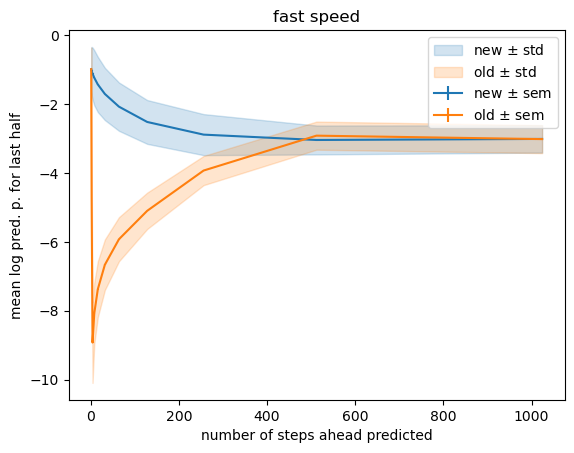

In [151]:
%matplotlib inline
plt.errorbar(new_way_br.bw_parameters["lookahead_steps"], new_way_means, new_way_stds/np.sqrt(T/2))
plt.errorbar(new_way_br.bw_parameters["lookahead_steps"], old_way_means, old_way_stds/np.sqrt(T/2),)
plt.fill_between(new_way_br.bw_parameters["lookahead_steps"], new_way_means - new_way_stds,new_way_means+ new_way_stds, color="C0", alpha=0.2)
plt.fill_between(new_way_br.bw_parameters["lookahead_steps"], old_way_means - old_way_stds,old_way_means+ old_way_stds, color="C1", alpha=0.2)
plt.legend(["new $\pm$ std", "old $\pm$ std","new $\pm$ sem", "old $\pm$ sem"])
plt.ylabel("mean log pred. p. for last half")
plt.xlabel("number of steps ahead predicted")
plt.title(f"{dataset}")

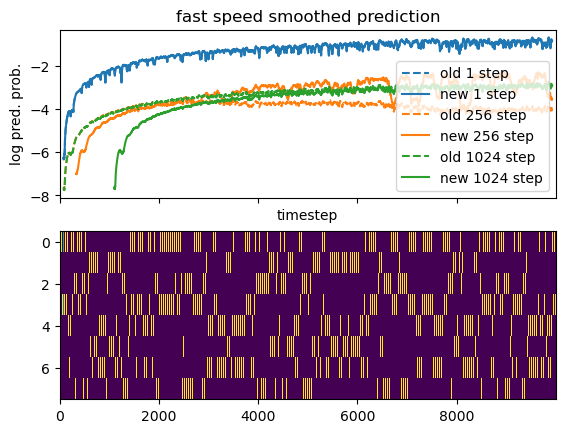

In [152]:
%matplotlib inline

fig, axs = plt.subplots(2,1, sharex=True)
steps = [1,256,1024]
for si, step in enumerate(steps):
    i = new_way_br.bw_parameters["lookahead_steps"].index(step)
    old_pred = old_way_br.pred_list[:,i]
    new_pred = new_way_br.pred_list[:,i]
    # plt.plot(pred)
    half_width = 75
    kernel = np.linspace(0,10,half_width)
    kernel = np.exp(kernel)
    kernel = np.hstack((kernel, np.flip(kernel)))
    kernel = kernel/kernel.sum()
    smoothed_old_pred = np.convolve(old_pred, kernel, 'valid')
    smoothed_new_pred = np.convolve(new_pred, kernel, 'valid')
    axs[0].plot(np.arange(smoothed_old_pred.size) + half_width,smoothed_old_pred, color=f'C{si}', linestyle='dashed')
    x_correction = (step-1)*1
    axs[0].plot(np.arange(smoothed_new_pred.size) + half_width + x_correction,smoothed_new_pred, color=f'C{si}',linestyle='solid')

legend = []
for step in steps:
    legend.append(f"old {step} step")
    legend.append(f"new {step} step")
axs[0].legend(legend)
axs[0].set_title(f"{dataset} smoothed prediction")
axs[0].set_xlabel("timestep")
axs[0].set_ylabel("log pred. prob.");

if states is None:
    axs[1].plot(states,'.')
else:
    alpha = new_way_br.alpha_list.T
    alpha = alpha[alpha.mean(axis=1)>.003,:]
    alpha = alpha[np.argsort(-alpha.mean(axis=1)) - (alpha.shape[0]//2),:]
    axs[1].imshow((alpha), aspect="auto", interpolation="nearest")
# axs[0].set_xlim([500, 1000])

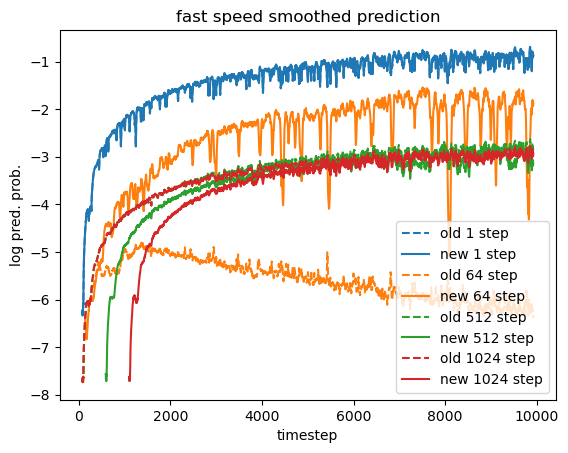

In [153]:
%matplotlib inline
# steps = [1,5,10]
steps = [1,64, 512, 1024]
for si, step in enumerate(steps):
    i = new_way_br.bw_parameters["lookahead_steps"].index(step)
    old_pred = old_way_br.pred_list[:,i]
    new_pred = new_way_br.pred_list[:,i]
    # plt.plot(pred)
    half_width = 75
    kernel = np.linspace(0,10,half_width)
    kernel = np.exp(kernel)
    kernel = np.hstack((kernel, np.flip(kernel)))
    kernel = kernel/kernel.sum()
    smoothed_old_pred = np.convolve(old_pred, kernel, 'valid')
    smoothed_new_pred = np.convolve(new_pred, kernel, 'valid')
    plt.plot(np.arange(smoothed_old_pred.size) + half_width,smoothed_old_pred, color=f'C{si}', linestyle='dashed')
    plt.plot(np.arange(smoothed_new_pred.size) + half_width +step-1 ,smoothed_new_pred, color=f'C{si}',linestyle='solid')

legend = []
for step in steps:
    legend.append(f"old {step} step")
    legend.append(f"new {step} step")
plt.legend(legend)
plt.title(f"{dataset} smoothed prediction")
plt.xlabel("timestep")
plt.ylabel("log pred. prob.");

In [628]:
i = new_way_br.bw_parameters["lookahead_steps"].index(1)
pred = new_way_br.pred_list[:,i]
plt.plot(pred)
half_width = 75
kernel = np.linspace(0,10,half_width)
kernel = np.exp(kernel)
kernel = np.hstack((kernel, np.flip(kernel)))
kernel = kernel/kernel.sum()
smoothed_pred = np.convolve(pred, kernel, 'valid')
plt.plot(np.arange(smoothed_pred.size) + half_width,smoothed_pred)

In [602]:
s = np.sort(np.abs(np.linalg.eigvals(old_way_br.A)))[::-1]
plt.plot(s,'.')

In [399]:
np.abs(s).shape

(200,)

In [441]:
%matplotlib qt
plt.plot(new_way_br.pred_list[:,0])

# Old analysis

In [ ]:
run_files = []

for file in os.listdir():
    if os.path.isfile(file) and re.search("bubblewrap_run_.*\.pickle",file):
        run_files.append(file)

In [ ]:
runs = []
for file in run_files:
    with open(file, "rb") as fhan:
        br = pickle.load(fhan)
        if br.bw_parameters and "seed" not in br.bw_parameters:
            br.bw_parameters["seed"] = 42
        runs.append(br)

In [ ]:
# num, lam, nu, eps, B_thresh
columns = {}

for param in ["num", "nu", "lam", "eps", "B_thresh", "seed"]:
    columns[param] = [runs[x].bw_parameters[param] for x in range(len(runs))]


columns["ent1"] = [runs[x].entropy_list[-100:,0].mean() for x in range(len(runs))]
columns["ent10"] = [runs[x].entropy_list[-100:,1].mean() for x in range(len(runs))]
columns["pred1"] = [runs[x].pred_list[-100:,0].mean() for x in range(len(runs))]
columns["pred10"] = [runs[x].pred_list[-100:,1].mean() for x in range(len(runs))]
columns["time"] = [runs[x].time_to_run if hasattr(runs[x], "time_to_run") else None for x in range(len(runs))]

columns["file"] = [runs[x].file for x in range(len(runs))]
columns["run"] = runs
columns["location"] = run_files
fdf = pd.DataFrame(columns)

In [ ]:
unique_files = fdf.file.unique()
unique_files

array(['./generated/lorenz_1trajectories_3dim_500to20500_noise0.05.npz',
       './generated/vdp_1trajectories_2dim_500to20500_noise0.2.npz',
       './generated/lorenz_1trajectories_3dim_500to20500_noise0.2.npz',
       './generated/vdp_1trajectories_2dim_500to20500_noise0.05.npz',
       'generated/vdp_100trajectories_2dim_500to20500_noise0.2.npz',
       'generated/vdp_1trajectories_2dim_500to20500_noise0.2.npz'],
      dtype=object)

In [ ]:
df = fdf[fdf.file == unique_files[0]]

In [ ]:
correlations = df.corr(numeric_only=True)
params = ["num", "nu", "lam", "eps", "B_thresh"]
metrics = ["ent1","ent10","pred1","pred10", "time"]
param_comparison = correlations.loc[params, metrics]
param_comparison

,ent1,ent10,pred1,pred10,time
num,0.479419,0.820371,0.614206,-0.111629,0.949386
nu,-0.000744,0.014677,0.024215,0.046374,0.041001
lam,-0.048973,-0.047700,-0.018634,-0.062965,-0.055963
eps,0.573448,0.291129,-0.523616,-0.610617,0.022681
B_thresh,0.380212,0.257026,-0.019321,-0.202639,0.230475


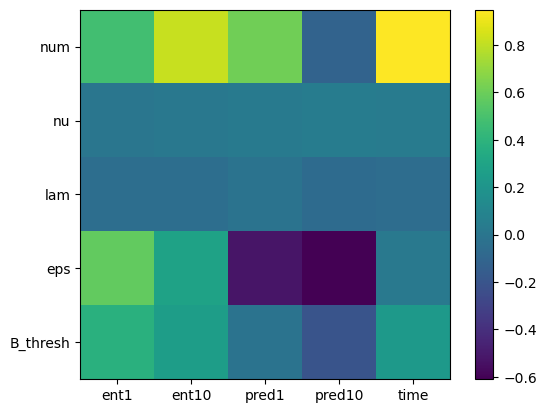

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(param_comparison)
#np.convolve(np.arange(len(metrics)+1), [.5, .5])
ax.set_xticks(np.arange(len(metrics)))
ax.set_xticklabels(metrics)

ax.set_yticks(np.arange(len(params)))
ax.set_yticklabels(params)

fig.colorbar(im)

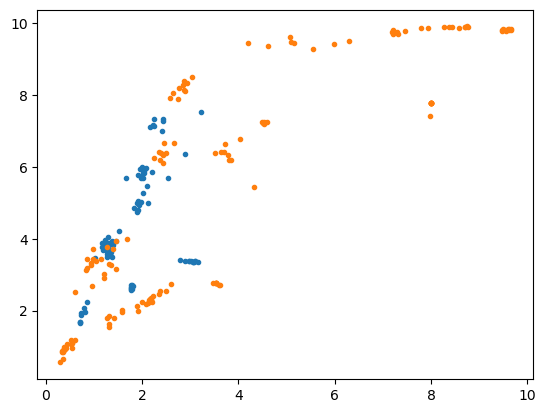

In [ ]:
mask = df.eps == .0001
a = df.ent1
b = df.ent10
plt.plot(a[mask], b[mask], '.')
plt.plot(a[~mask], b[~mask], '.')

In [ ]:
df

,num,nu,lam,eps,B_thresh,seed,ent1,ent10,pred1,pred10,time,file,run,location
0,1024,0.0010,0.0010,0.0001,-5,42,2.154670,7.117517,-6.093047,-12.112070,46.776133,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-04-23-19-59.pickle
2,16,0.0010,0.0010,0.0001,-15,42,0.822588,1.974006,-10.159780,-10.493128,16.526105,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-08-25-50.pickle
6,1024,0.0010,0.0001,0.0010,-10,42,2.867526,8.383525,-6.963832,-11.433135,41.378214,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-04-23-03-42.pickle
10,16,0.0010,0.0010,0.0010,-15,42,0.361579,0.840695,-10.937058,-11.063611,16.207495,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-04-23-21-43.pickle
11,1024,0.0001,0.0010,0.0010,-5,42,6.305058,9.517545,-7.644871,-11.500990,48.316343,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-10-02-16.pickle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,1024,0.0100,0.0001,0.0100,-10,42,8.741961,9.911880,-9.288745,-12.022569,42.979244,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-05-41-50.pickle
849,16,0.0100,0.0100,0.0001,-15,42,0.726606,1.871307,-10.216708,-10.486780,16.536573,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-06-59-11.pickle
850,16,0.0010,0.0001,0.0010,-15,390,0.364190,0.890838,-11.000175,-11.104077,16.223406,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-12-04-26.pickle
853,1024,0.0001,0.0100,0.0001,-5,580,2.432374,7.277180,-6.242277,-12.084297,46.838399,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-12-29-18.pickle


In [ ]:
for file in df.loc[df.iloc[:,:-2].duplicated(),"location"]:
    print(f"mv {file} duplicates")